Nano Particles Toxicity Analysis

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV


In [68]:
# loading the data set
df=pd.read_csv('nanotox_dataset.csv')
df.head()

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic


In [69]:
df.isnull().sum()

NPs           0
coresize      0
hydrosize     0
surfcharge    0
surfarea      0
Ec            0
Expotime      0
dosage        0
e             0
NOxygen       0
class         0
dtype: int64

In [70]:
df.duplicated().sum()

487

In [71]:
df=df.drop_duplicates()

In [72]:
df.shape

(394, 11)

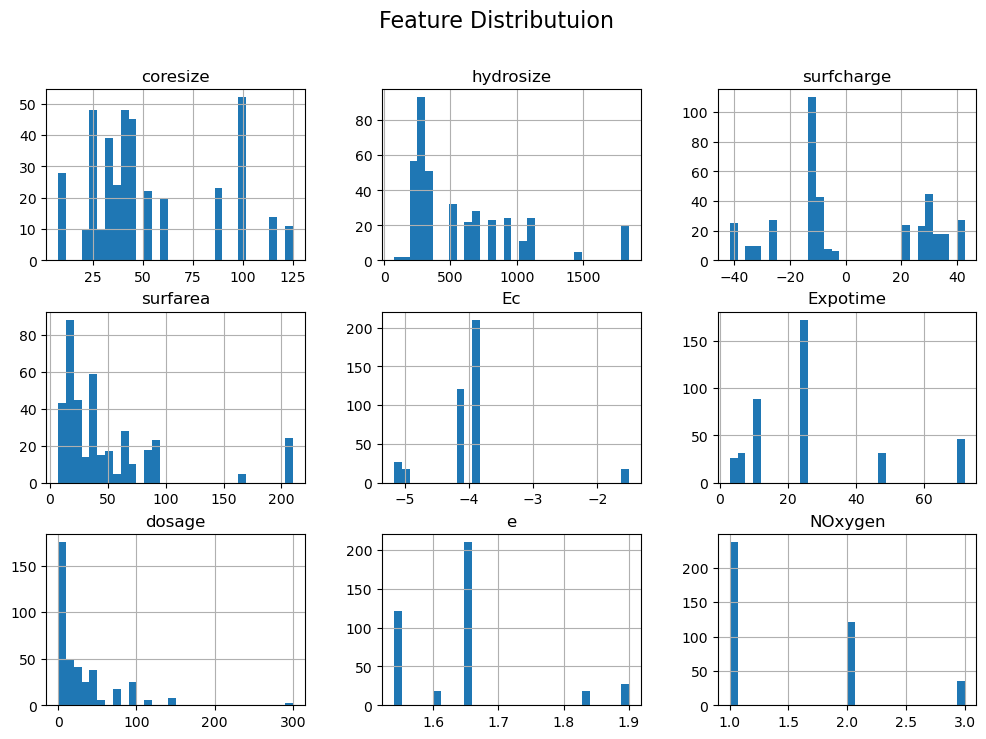

C:\Users\User\AppData\Local\Temp\ipykernel_10792\2320088299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class',data=df,palette='viridis')


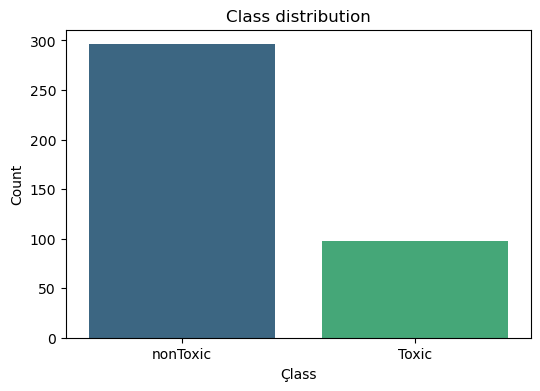

In [73]:
## Feature Distribution

df.hist(figsize=(12,8), bins=30)
plt.suptitle('Feature Distributuion',fontsize=16)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='class',data=df,palette='viridis')

plt.title('Class distribution')
plt.xlabel('Çlass')
plt.ylabel('Count')
plt.show()

In [74]:
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Encode categorical varibales like NPs and class

label_encoders ={}
for col in ['NPs','class']:
    label_encoders[col]=LabelEncoder()
    df.loc[:, col] = label_encoders[col].fit_transform(df[col]).astype('int64')
    
# Save label encoders for future use
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

In [75]:
# Scale numerical features
scaler = StandardScaler()
numeric_cols = df.columns[df.dtypes != "object"].tolist()  # Get numeric column names
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [76]:
df.head()

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,0,-0.395962,-0.751602,1.328941,0.31775,3.773641,-0.100883,-0.767817,-0.306042,2.295929,1
1,0,-0.395962,-0.751602,1.328941,0.31775,3.773641,-0.100883,-0.767593,-0.306042,2.295929,1
2,0,-0.395962,-0.751602,1.328941,0.31775,3.773641,-0.100883,-0.765356,-0.306042,2.295929,1
3,0,-0.395962,-0.751602,1.328941,0.31775,3.773641,-0.100883,-0.742985,-0.306042,2.295929,1
4,0,-0.395962,-0.751602,1.328941,0.31775,3.773641,-0.100883,-0.643559,-0.306042,2.295929,1


Preprocessing Done

In [77]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['class'])
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Check the shape
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (315, 10), X_test shape: (79, 10)
y_train shape: (315,), y_test shape: (79,)


In [78]:
X_train

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
308,4,1.508473,-0.736235,-0.538201,-0.584651,0.169829,1.103597,-0.270709,0.105496,-0.744730
318,4,1.508473,-0.736235,-0.538201,-0.584651,0.169829,-0.100883,-0.146425,0.105496,-0.744730
445,4,-0.639148,1.231624,0.757128,-0.241456,0.169829,2.308076,0.474992,0.105496,-0.744730
416,4,-0.007495,0.143971,1.060539,-0.685591,0.169829,-0.703123,-0.146425,0.105496,-0.744730
63,3,-0.860227,-0.181364,-0.499302,3.251058,-0.239006,-1.004242,-0.270709,-1.026233,0.775599
...,...,...,...,...,...,...,...,...,...,...
255,4,-0.219099,-0.648359,1.188905,-0.558407,0.169829,-0.100883,-0.270709,0.105496,-0.744730
274,4,1.982213,-0.192169,-0.433175,-0.695685,0.169829,-0.100883,-0.022142,0.105496,-0.744730
405,4,-0.007495,0.143971,1.060539,-0.685591,0.169829,-0.100883,-0.729066,0.105496,-0.744730
477,4,-0.525451,-0.826033,-1.701275,-0.425166,0.169829,1.103597,-0.765356,0.105496,-0.744730


In [96]:
X_test

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
423,4,-1.412924,0.516126,0.982741,0.828505,0.169829,2.308076,-0.146425,0.105496,-0.744730
386,4,1.066316,0.256818,1.134447,-0.847094,0.169829,-0.100883,-0.612488,0.105496,-0.744730
41,2,-0.307530,0.905088,-0.402056,0.683152,-1.495798,-0.100883,-0.519275,1.957416,2.295929
168,3,-0.386487,-0.618826,-1.066058,0.020987,-0.239006,-0.100883,-0.767842,-1.026233,0.775599
429,4,-1.412924,0.516126,0.982741,0.828505,0.169829,-0.100883,-0.457134,0.105496,-0.744730
...,...,...,...,...,...,...,...,...,...,...
287,4,0.245166,-0.602740,-0.444844,-0.840230,0.169829,-0.100883,-0.767842,0.105496,-0.744730
198,3,-0.544400,2.962744,-1.463992,0.343994,-0.239006,-0.703123,-0.146425,-1.026233,0.775599
325,4,1.508473,-0.736235,-0.538201,-0.584651,0.169829,-1.004242,-0.394992,0.105496,-0.744730
201,3,-0.702314,3.032373,-1.281168,0.404558,-0.239006,2.308076,-0.612488,-1.026233,0.775599


In [79]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Convert y_train to a Pandas Series
y_train_series = pd.Series(y_train)



In [80]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Check training and testing accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9060
Testing Accuracy: 0.7030


In [86]:
y_train=y_train_series.astype('int64') 

In [89]:
y_test=y_test.astype('int64') 

In [87]:
y_train

308    1
318    1
445    0
416    1
63     1
      ..
255    0
274    1
405    1
477    1
188    1
Name: class, Length: 315, dtype: int64

In [90]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate again
print("Optimized Model Accuracy:", best_rf.score(X_test, y_test))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Model Accuracy: 0.9240506329113924


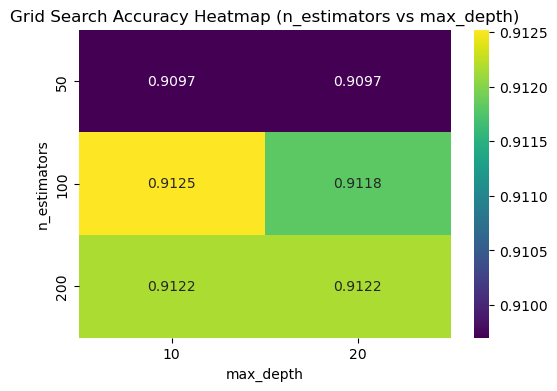

In [93]:

# Extract results from GridSearchCV
results = grid_search.cv_results_

# Create a dataframe from the results for easy manipulation
results_df = pd.DataFrame(results)

scores_pivot = results_df.pivot_table(
    index='param_n_estimators',
    columns='param_max_depth',
    values='mean_test_score'
)

# Create the heatmap
plt.figure(figsize=(6, 4))
# You can use 'scores_pivot' directly with seaborn's heatmap or matplotlib's imshow
import seaborn as sns
sns.heatmap(scores_pivot, annot=True, cmap='viridis', fmt=".4f")

plt.title('Grid Search Accuracy Heatmap (n_estimators vs max_depth)')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.show()


In [94]:
# Train the best model after hyperparameter tuning
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Calculate training accuracy for the optimized model
train_accuracy_optimized = best_rf_model.score(X_train, y_train)
print(f"Optimized Model Training Accuracy: {train_accuracy_optimized:.4f}")

# Save the optimized model
import pickle
with open("optimized_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

print("Optimized model saved successfully!")

Optimized Model Training Accuracy: 0.9524
Optimized model saved successfully!


In [95]:
# Load the saved model
with open("optimized_rf_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test with new data
sample = X_test.iloc[0:1]  # Take one sample from test set
prediction = loaded_model.predict(sample)
print("Predicted Class:", prediction)

Predicted Class: [0]


In [98]:
# calculating testing accuracy 
from sklearn.metrics import accuracy_score

with open("optimized_rf_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9241


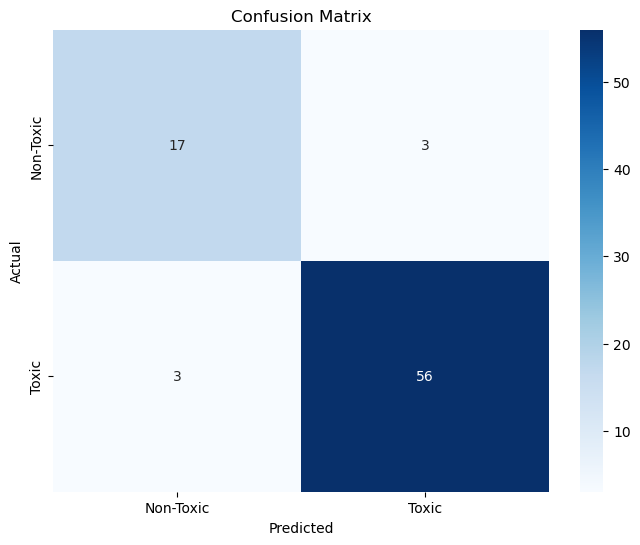

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.95      0.95      0.95        59

    accuracy                           0.92        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.92      0.92      0.92        79

Confusion Matrix:
 [[17  3]
 [ 3 56]]


In [99]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = loaded_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Toxic", "Toxic"], yticklabels=["Non-Toxic", "Toxic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print detailed evaluation report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

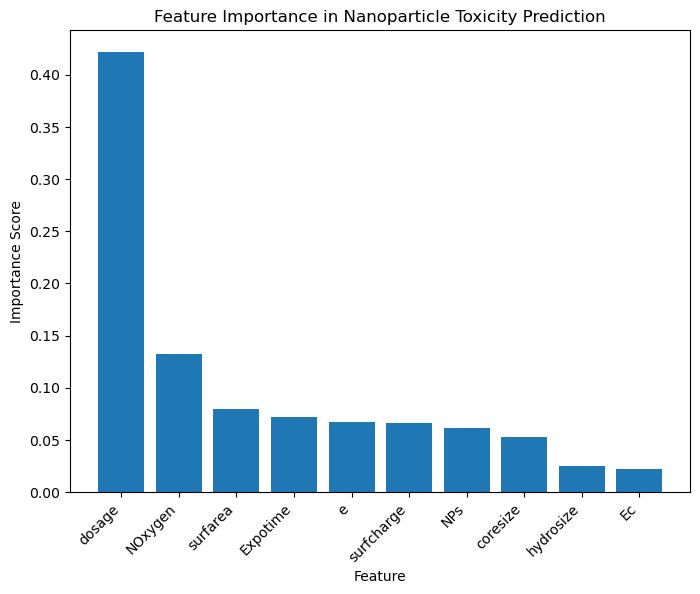

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = loaded_model.feature_importances_

# Create a bar chart
features = X.columns
indices = np.argsort(feature_importances)[::-1]  # Sort by importance

plt.figure(figsize=(8, 6))
plt.title("Feature Importance in Nanoparticle Toxicity Prediction")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

In [102]:
import pickle

# Load the saved label encoders
with open("label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

print("Label encoders loaded successfully!")

Label encoders loaded successfully!


In [103]:
# Load label encoders
with open("label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

# Define a new sample (ensure it matches feature structure)
new_sample_df = pd.DataFrame([X_test.iloc[0].values], columns=X.columns)

# Predict class
prediction = loaded_model.predict(new_sample_df)

# Convert back to original class labels
predicted_class = label_encoders['class'].inverse_transform(prediction)

print("Predicted Toxicity:", predicted_class[0])

Predicted Toxicity: Toxic


In [104]:
import joblib

# Save the trained model
model_filename = "nanotox_rf_model.pkl"
joblib.dump(rf_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as nanotox_rf_model.pkl
